In [1]:
import pandas as pd
import xlwings as xw #xlwings is an open-source Python library that makes it easy to automate Excel with Python.

import numpy as np
from numpy import *
from numpy.linalg import multi_dot

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
# matplotlib rcParams rcdefaults() command will restore the standard matplotlib default settings. 
#There is some degree of validation when setting the values of rcParams, see matplotlib.
rcParams['figure.figsize'] = 12, 6

In [2]:
# FAANG stocks
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX' ]
numofasset = len(symbols)
numofportfolio = 5000

In [3]:
# Load locally stored data
df = pd.read_csv('faang_stocks.csv', index_col=0, parse_dates=True)['2013':]

# Check first 5 values 
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-05-31,56.813087,269.200012,24.350000,433.983337,32.321430
2013-06-03,56.938175,266.880005,23.850000,432.195038,31.709999
2013-06-04,56.760036,265.700012,23.520000,427.945953,32.187141
2013-06-05,56.229465,267.170013,22.900000,428.244843,31.922857
2013-06-06,55.389381,267.829987,22.969999,430.705597,31.105715


In [4]:
# View data in Excel
xw.view(df) #automatically open the data in a new excel workbook

In [5]:
# Create a new Excel workbook
#wb=xw.Book()
#wb=xw.Book('Book1')
wb = xw.Book('Book1.xlsx')     # Book by full name

In [6]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
AAPL,1783.0,142.832064,66.202552,49.745098,93.902187,118.200256,180.594032,366.529999
AMZN,1783.0,1011.676613,641.935431,265.700012,389.240005,808.330017,1669.690002,2764.409912
FB,1783.0,128.142058,52.540156,22.900000,79.500000,128.470001,175.115005,242.240005
GOOG,1783.0,856.964064,288.787824,421.868744,573.595184,791.549988,1106.784973,1526.689941
NFLX,1783.0,180.845185,124.162330,29.662857,67.692860,125.889999,307.490005,468.040009


In [7]:
# Write summary statistics to Excel
wb.sheets.add('summary')
wb.sheets['summary']['A2'].value = summary

com_error: (-2147417848, '被调用的对象已与其客户端断开连接。', None, None)

C:\Software\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


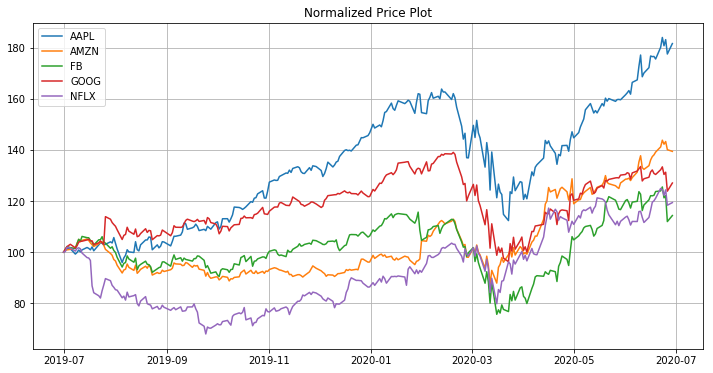

In [8]:
# Visualize the data
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(df[-252:]/df.iloc[-252] * 100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)

In [9]:
# Pass to Excel as picture
wb.sheets.add('Normalized Price Plot')
wb.sheets['Normalized Price Plot'].pictures.add(ax.get_figure(),  name = 'Normalized Price Plot', update = True);

com_error: (-2147023174, 'RPC 服务器不可用。', None, None)

In [10]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-05-31,0.000000,0.000000,0.000000,0.000000,0.000000
2013-06-03,0.002202,-0.008618,-0.020534,-0.004121,-0.018917
2013-06-04,-0.003129,-0.004421,-0.013836,-0.009831,0.015047
2013-06-05,-0.009348,0.005533,-0.026361,0.000698,-0.008211
2013-06-06,-0.014940,0.002470,0.003057,0.005746,-0.025597


In [11]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

AAPL    0.298977
AMZN    0.370623
FB      0.368988
GOOG    0.197999
NFLX    0.459583
dtype: float64

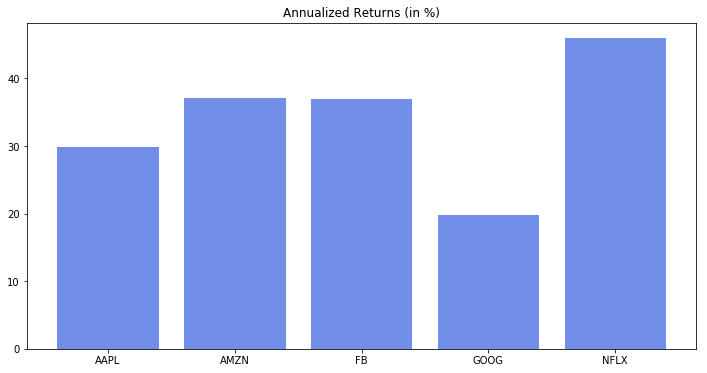

In [12]:
# Visualize the data
fig = plt.figure(figsize=(12,6))
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');

In [13]:
vols = returns.std()
vols

AAPL    0.017170
AMZN    0.019076
FB      0.021472
GOOG    0.016232
NFLX    0.026522
dtype: float64

In [14]:
# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols

AAPL    0.272570
AMZN    0.302814
FB      0.340857
GOOG    0.257678
NFLX    0.421021
dtype: float64

C:\Software\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


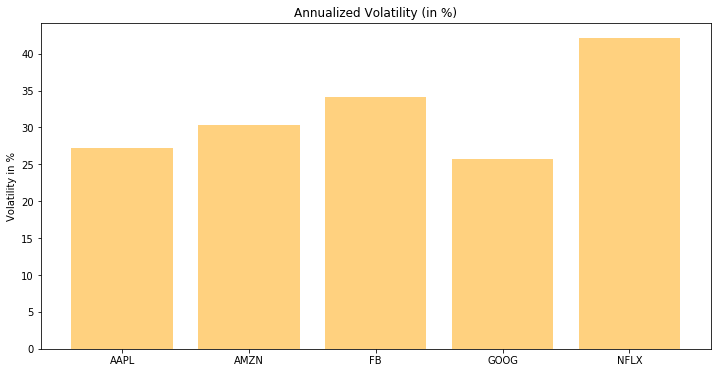

In [15]:
# Visualize the data
fig = plt.figure(figsize=(12,6))
_=plt.ylabel('Volatility in %')
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');

In [16]:
wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts


array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [17]:
wts.shape

(5, 1)

In [18]:
array(returns.mean() * 252)[:,newaxis]  

array([[0.29897712],
       [0.37062294],
       [0.36898769],
       [0.19799884],
       [0.4595831 ]])

In [19]:
array(returns.mean() * 252)[:,newaxis].shape 

(5, 1)

In [20]:
# Portfolio returns
wts.T @ array(returns.mean() * 252)[:,newaxis]    

array([[0.33923394]])

In [21]:
# Covariance matrix
returns.cov() * 252

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.074295,0.038555,0.042631,0.039498,0.041292
AMZN,0.038555,0.091696,0.053521,0.048341,0.060735
FB,0.042631,0.053521,0.116183,0.051301,0.056706
GOOG,0.039498,0.048341,0.051301,0.066398,0.049665
NFLX,0.041292,0.060735,0.056706,0.049665,0.177258


In [22]:
# Portfolio variance
multi_dot([wts.T,returns.cov()*252,wts])

array([[0.05961271]])

In [23]:
# Portfolio volatility
sqrt(multi_dot([wts.T,returns.cov()*252,wts]))

array([[0.24415713]])

In [31]:
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return np.array([port_rets, port_vols, port_rets/port_vols]).flatten()

In [32]:
# import pyfolio as pf
# ewp = returns@wts
# ewp.columns =['ret']
# ewp.cumsum().iloc[-1]
# pf.create_simple_tear_sheet(ewp['ret'])
# plt.plot((1+ewp['ret']).cumprod())

In [33]:
w = random.random(numofasset)[:, newaxis]
w

array([[0.3258886 ],
       [0.23662732],
       [0.11048094],
       [0.84495015],
       [0.43195055]])

In [34]:
w /= sum(w)
w

array([[0.16713114],
       [0.12135372],
       [0.05665987],
       [0.43333054],
       [0.22152474]])

In [35]:
w.shape, sum(w)

((5, 1), 0.9999999999999999)

In [36]:
w.flatten()

array([0.16713114, 0.12135372, 0.05665987, 0.43333054, 0.22152474])

In [37]:

numofasset=returns.shape[1]
# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):
    
    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]
    
    # Set weights such that sum of weights equals 1
    weights /= sum(weights)
    
    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values     
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)


In [38]:
# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):
    
    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]
    
    # Set weights such that sum of weights equals 1
    weights /= sum(weights)
    
    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values     
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)

In [44]:
port_rets
print(port_rets.shape)
print(numofasset)
print(weights)

(5000,)
5
[[0.2677729 ]
 [0.2257905 ]
 [0.23077974]
 [0.19414649]
 [0.08151036]]


In [45]:
port_vols

array([0.23455434, 0.25462583, 0.27028337, ..., 0.26756218, 0.27057661,
       0.2367787 ])

In [46]:
port_wts

array([[0.27541972, 0.11896172, 0.16986147, 0.30358151, 0.13217559],
       [0.21933718, 0.20160862, 0.25114111, 0.06924644, 0.25866665],
       [0.02706319, 0.14990984, 0.32067558, 0.18938976, 0.31296164],
       ...,
       [0.13742764, 0.34297556, 0.15264187, 0.04072746, 0.32622746],
       [0.09018552, 0.20630433, 0.02235643, 0.28635294, 0.39480078],
       [0.2677729 , 0.2257905 , 0.23077974, 0.19414649, 0.08151036]])

In [47]:
port_rets.shape, port_vols.shape, port_wts.shape

((5000,), (5000,), (5000, 5))

In [48]:
# Create a dataframe for analysis
mc_df = pd.DataFrame({'returns': port_rets,
                      'volatility': port_vols,
                      'sharpe_ratio': port_rets/port_vols,
                      'weights': list(port_wts)})
mc_df.head()

,returns,volatility,sharpe_ratio,weights
0,0.309965,0.234554,1.321508,"[0.27541971654494135, 0.11896171788228115, 0.1..."
1,0.365555,0.254626,1.435656,"[0.21933718022663246, 0.20160861835446273, 0.2..."
2,0.363307,0.270283,1.344172,"[0.027063188430659663, 0.14990983529677096, 0...."
3,0.406247,0.311623,1.303648,"[0.054232986780645955, 0.017441099292035554, 0..."
4,0.366075,0.265766,1.377433,"[0.010215372690359228, 0.30643404645315797, 0...."


In [49]:
# Summary Statistics
mc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.339005,0.024572,0.249034,0.322927,0.338819,0.355268,0.429005
volatility,5000.0,0.250892,0.013216,0.228834,0.241501,0.248217,0.257632,0.353762
sharpe_ratio,5000.0,1.350822,0.060687,1.057245,1.315464,1.358031,1.395096,1.472042


In [50]:
# Write summary Statistics to Excel
wb.sheets[1]['A12'].value = mc_df.describe().T

com_error: (-2147023174, 'RPC 服务器不可用。', None, None)

In [51]:
# Max sharpe ratio portfolio 
msrp = mc_df.iloc[mc_df['sharpe_ratio'].idxmax()]
msrp

returns                                                  0.369187
volatility                                               0.250799
sharpe_ratio                                              1.47204
weights         [0.2889872604362633, 0.31013959311524364, 0.17...
Name: 2938, dtype: object

In [52]:
# Max sharpe ratio portfolio weights
max_sharpe_port_wts = mc_df['weights'][mc_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))

{'AAPL': 28.9, 'AMZN': 31.01, 'FB': 17.51, 'GOOG': 0.2, 'NFLX': 22.37}

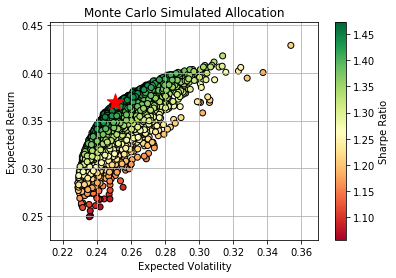

In [53]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

In [54]:
# Pass to Excel as picture
wb.sheets.add('Monte Carlo')
wb.sheets['Monte Carlo'].pictures.add(ax.get_figure(),  name = 'Monte Carlo Simulated Allocation', update = True);

com_error: (-2147023174, 'RPC 服务器不可用。', None, None)

In [55]:
# Import optimization module from scipy
import scipy.optimize as sco
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

In [57]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [58]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [59]:
opt_sharpe

     fun: -1.4734291074128651
     jac: array([-1.87188387e-04, -6.86794519e-05,  5.57824969e-04,  3.10226992e-01,
       -1.21131539e-04])
 message: 'Optimization terminated successfully.'
    nfev: 29
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.29833724, 0.31741401, 0.18292631, 0.        , 0.20132244])

In [60]:
# Portfolio weights
list(zip(symbols,np.around(opt_sharpe['x']*100,2)))

[('AAPL', 29.83),
 ('AMZN', 31.74),
 ('FB', 18.29),
 ('GOOG', 0.0),
 ('NFLX', 20.13)]

In [61]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.3669), ('Volatility', 0.249), ('Sharpe Ratio', 1.4734)]

In [62]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [63]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [64]:
opt_var

     fun: 0.052327512467020706
     jac: array([0.10473697, 0.1044406 , 0.10485034, 0.10460897, 0.10499356])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.36734231, 0.15697805, 0.05859232, 0.38763986, 0.02944746])

In [65]:
# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))

[('AAPL', 36.73),
 ('AMZN', 15.7),
 ('FB', 5.86),
 ('GOOG', 38.76),
 ('NFLX', 2.94)]

In [66]:
# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.2799), ('Volatility', 0.2288), ('Sharpe Ratio', 1.2236)]

In [67]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [68]:
targetrets = linspace(0.22,0.50,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

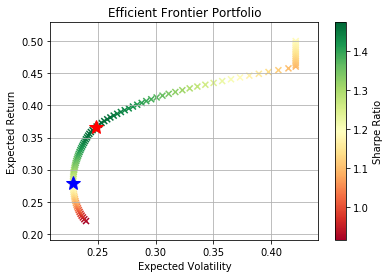

In [69]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols, 
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)